In [1]:
## Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
# Read roll call votes from csv into data frame

df_roll_votes = pd.read_csv('Data\\114th Senate Roll Call Votes.csv', index_col=0)
df_roll_votes = df_roll_votes.sort_values('rollnumber', ascending='False').reset_index(drop=True)
df_roll_votes.head()

,icpsr,id,name,state_abbrev,vote,party_code,rollcallvote_id,chamber,congress,date,rollnumber,description
0,14852,MS11414852,"ROBERTS, Charles Patrick (Pat)",KS,6,200,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
1,41305,MS11441305,"KAINE, Timothy Michael (Tim)",VA,1,100,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
2,41304,MS11441304,"CRUZ, Rafael Edward (Ted)",TX,6,200,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
3,41303,MS11441303,"HEITKAMP, Mary Kathryn (Heidi)",ND,6,100,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
4,41302,MS11441302,"FISCHER, Debra (Deb)",NE,6,200,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.


In [3]:
# Mapping votes to 'Yea' (from 1), 'Nay' (from 6), 'Abs' (from 7 or 9)
# Mapping party codes for Democrats to 'D' (from 100), for Independents to 'D' (from 328; doing this 
# since both Sens. King and Sanders caucus with Democrats), and for Republicans to 'R' (from 200)

votemap = {1:'Yea', 6:'Nay', 7:'Abs', 9:'Abs'}
partycodemap = {100:'D', 328:'D', 200:'R'}
df_roll_votes['vote'] = df_roll_votes['vote'].map(votemap)
df_roll_votes['party_code'] = df_roll_votes['party_code'].map(partycodemap)
df_roll_votes.head()

,icpsr,id,name,state_abbrev,vote,party_code,rollcallvote_id,chamber,congress,date,rollnumber,description
0,14852,MS11414852,"ROBERTS, Charles Patrick (Pat)",KS,Nay,R,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
1,41305,MS11441305,"KAINE, Timothy Michael (Tim)",VA,Yea,D,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
2,41304,MS11441304,"CRUZ, Rafael Edward (Ted)",TX,Nay,R,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
3,41303,MS11441303,"HEITKAMP, Mary Kathryn (Heidi)",ND,Nay,D,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
4,41302,MS11441302,"FISCHER, Debra (Deb)",NE,Nay,R,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.


In [4]:
# Pivot on 'name' to create dataframe of senators and their roll votes

df_pivoted = df_roll_votes.pivot(index='name', columns='rollnumber', values='vote')
df_pivoted.columns = df_pivoted.columns.astype(str)
df_pivoted.head()

rollnumber,1,2,3,4,5,6,7,8,9,10,...,493,494,495,496,497,498,499,500,501,502
name,,,,,,,,,,,,,,,,,,,,,
"ALEXANDER, Lamar",Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
"AYOTTE, Kelly",Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
"BALDWIN, Tammy",Yea,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea
"BARRASSO, John A.",Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
"BENNET, Michael F.",Nay,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea


In [5]:
# Create a list of senators and their party

df_party_id = df_roll_votes.drop_duplicates(['name', 'party_code'])
df_party_id = df_party_id[['name', 'party_code']]
df_party_id.head()

,name,party_code
0,"ROBERTS, Charles Patrick (Pat)",R
1,"KAINE, Timothy Michael (Tim)",D
2,"CRUZ, Rafael Edward (Ted)",R
3,"HEITKAMP, Mary Kathryn (Heidi)",D
4,"FISCHER, Debra (Deb)",R


In [6]:
# Add senator's party to dataframe with all of their roll votes

df_votes = pd.merge(df_party_id, df_pivoted, on='name', how='inner')
df_votes.head()

,name,party_code,1,2,3,4,5,6,7,8,...,493,494,495,496,497,498,499,500,501,502
0,"ROBERTS, Charles Patrick (Pat)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
1,"KAINE, Timothy Michael (Tim)",D,Yea,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,"CRUZ, Rafael Edward (Ted)",R,Nay,Yea,Yea,Yea,Yea,Nay,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea
3,"HEITKAMP, Mary Kathryn (Heidi)",D,Nay,Yea,Yea,Yea,Nay,Yea,Nay,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea
4,"FISCHER, Debra (Deb)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea


In [7]:
# Read supplementary information from csv into dataframe

df_supp_info = pd.read_csv('Data\\Supplementary Senator Info.csv')
df_supp_info.head()

,name,age,gender,urban_rural,born_in_state
0,"ROBERTS, Charles Patrick (Pat)",78,Male,Rural,Yes
1,"KAINE, Timothy Michael (Tim)",56,Male,Urban,No
2,"CRUZ, Rafael Edward (Ted)",44,Male,Urban,No
3,"HEITKAMP, Mary Kathryn (Heidi)",59,Female,Rural,No
4,"FISCHER, Debra (Deb)",63,Female,Rural,Yes


In [8]:
# Merge voting information dataframe with supplementary information dataframe

df_unstandardized = pd.merge(df_votes, df_supp_info, on='name', how='inner')
df_unstandardized.head()

,name,party_code,1,2,3,4,5,6,7,8,...,497,498,499,500,501,502,age,gender,urban_rural,born_in_state
0,"ROBERTS, Charles Patrick (Pat)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,78,Male,Rural,Yes
1,"KAINE, Timothy Michael (Tim)",D,Yea,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Yea,Yea,Yea,56,Male,Urban,No
2,"CRUZ, Rafael Edward (Ted)",R,Nay,Yea,Yea,Yea,Yea,Nay,Yea,Nay,...,Yea,Yea,Nay,Nay,Yea,Yea,44,Male,Urban,No
3,"HEITKAMP, Mary Kathryn (Heidi)",D,Nay,Yea,Yea,Yea,Nay,Yea,Nay,Nay,...,Yea,Yea,Nay,Nay,Yea,Yea,59,Female,Rural,No
4,"FISCHER, Debra (Deb)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,63,Female,Rural,Yes


In [9]:
# One-hot encode categorical variables

num_roll_votes = df_roll_votes['rollnumber'].max()
dummy_col_nums = ['%d' % index for index in range(1,num_roll_votes+1)]
dummy_cols = ['party_code'] + dummy_col_nums + ['gender', 'urban_rural', 'born_in_state']
df_unstandardized_dummies = pd.get_dummies(df_unstandardized, prefix=dummy_cols, columns=dummy_cols)
df_unstandardized_dummies.head()

,name,age,party_code_D,party_code_R,1_Abs,1_Nay,1_Yea,2_Abs,2_Nay,2_Yea,...,501_Yea,502_Abs,502_Nay,502_Yea,gender_Female,gender_Male,urban_rural_Rural,urban_rural_Urban,born_in_state_No,born_in_state_Yes
0,"ROBERTS, Charles Patrick (Pat)",78,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,0,1
1,"KAINE, Timothy Michael (Tim)",56,1,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,1,0
2,"CRUZ, Rafael Edward (Ted)",44,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,1,1,0
3,"HEITKAMP, Mary Kathryn (Heidi)",59,1,0,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
4,"FISCHER, Debra (Deb)",63,0,1,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,0,1


In [10]:
# Standardize age column before doing PCA

senator_age = df_unstandardized_dummies['age'].astype(float)
senator_age_standardized = pd.DataFrame(preprocessing.scale(senator_age), columns=['age'])

df_standardized = pd.concat([df_unstandardized_dummies['name'], senator_age_standardized, df_unstandardized_dummies.iloc[:,2:]], axis=1)
df_standardized.head()

,name,age,party_code_D,party_code_R,1_Abs,1_Nay,1_Yea,2_Abs,2_Nay,2_Yea,...,501_Yea,502_Abs,502_Nay,502_Yea,gender_Female,gender_Male,urban_rural_Rural,urban_rural_Urban,born_in_state_No,born_in_state_Yes
0,"ROBERTS, Charles Patrick (Pat)",1.636745,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,0,1
1,"KAINE, Timothy Michael (Tim)",-0.447074,1,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,1,0
2,"CRUZ, Rafael Edward (Ted)",-1.583703,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,1,1,0
3,"HEITKAMP, Mary Kathryn (Heidi)",-0.162917,1,0,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
4,"FISCHER, Debra (Deb)",0.215959,0,1,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,0,1


In [11]:
# Perform PCA, including party_code. Arbitrarily choosing two components for PCA, will evaluate afterwards

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_standardized.iloc[:,1:])
df_principal = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
df_principal.head()

,Principal Component 1,Principal Component 2
0,-11.013639,-2.271380
1,10.491767,-2.433668
2,-7.832288,12.777076
3,5.501766,-3.558481
4,-11.286682,-0.761325


In [12]:
# Concatenate party_id dataframe (senator names and party_codes) for subsequent plotting

df_final = pd.concat([df_party_id, df_principal], axis=1)
df_final.head()

,name,party_code,Principal Component 1,Principal Component 2
0,"ROBERTS, Charles Patrick (Pat)",R,-11.013639,-2.271380
1,"KAINE, Timothy Michael (Tim)",D,10.491767,-2.433668
2,"CRUZ, Rafael Edward (Ted)",R,-7.832288,12.777076
3,"HEITKAMP, Mary Kathryn (Heidi)",D,5.501766,-3.558481
4,"FISCHER, Debra (Deb)",R,-11.286682,-0.761325


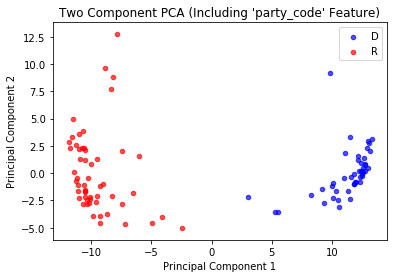

In [13]:
# Plotting principal components, coloring based on party_code

from mlxtend.plotting import category_scatter

col = ('blue', 'red')

fig = category_scatter(x='Principal Component 1', y='Principal Component 2', label_col='party_code', 
                       colors=col, data=df_final, markers='o', legend_loc='best')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Two Component PCA (Including \'party_code\' Feature)')
plt.show()


# Alternative scatter plot but without legend
#colors = np.where(df_final['party_code']=='R','red','blue')
#plt.scatter(df_final['Principal Component 1'], df_final['Principal Component 2'], c=colors)
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.title('Two Component PCA (Including \'party_code\' Feature)')
#plt.show()

In [14]:
# Senators closest to middle of senate along Principal Component 1

print df_final[np.abs(df_final['Principal Component 1']) < 7]

                              name party_code  Principal Component 1  \
3   HEITKAMP, Mary Kathryn (Heidi)          D               5.501766   
20                   DONNELLY, Joe          D               5.303004   
21         COLLINS, Susan Margaret          R              -2.495391   
24                 MURKOWSKI, Lisa          R              -6.531087   
32               MANCHIN, Joe, III          D               3.040285   
45              GRAHAM, Lindsey O.          R              -5.993090   
46               KIRK, Mark Steven          R              -4.145131   
90                   AYOTTE, Kelly          R              -4.945756   

    Principal Component 2  
3               -3.558481  
20              -3.553500  
21              -5.062279  
24              -1.831295  
32              -2.221212  
45               1.565314  
46              -4.005113  
90              -4.568375  


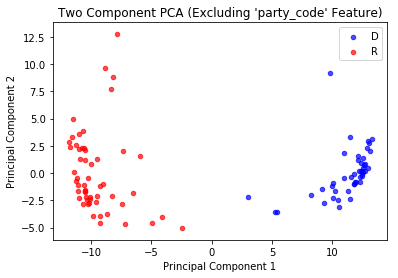

In [15]:
# Above uses 'party_code' label during PCA; can we predict party without knowing party_codes beforehand?
# Still using two components for PCA. Will evaluate this assumption afterwards

cols_to_exclude = ['name', 'party_code_D', 'party_code_R']
columns_to_include = [header for header in df_standardized.columns if not header in cols_to_exclude]

pca_no_party_label = PCA(n_components=2)
principalComponents_no_party_label = pca_no_party_label.fit_transform(df_standardized[columns_to_include])
df_principal_no_party_label = pd.DataFrame(data=principalComponents_no_party_label, columns=['Principal Component 1', 'Principal Component 2'])

df_final_no_party_label = pd.concat([df_party_id, df_principal_no_party_label], axis=1)

# Plotting
col = ('blue', 'red')
fig = category_scatter(x='Principal Component 1', y='Principal Component 2', label_col='party_code', 
                       colors=col, data=df_final_no_party_label, markers='o', legend_loc='best')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Two Component PCA (Excluding \'party_code\' Feature)')
plt.show()

In [16]:
# Senators closest to middle of Senate along Principal Component 1 without 'party_label'

print df_final_no_party_label[np.abs(df_final_no_party_label['Principal Component 1']) < 7]

                              name party_code  Principal Component 1  \
3   HEITKAMP, Mary Kathryn (Heidi)          D               5.462868   
20                   DONNELLY, Joe          D               5.263826   
21         COLLINS, Susan Margaret          R              -2.457515   
24                 MURKOWSKI, Lisa          R              -6.501981   
32               MANCHIN, Joe, III          D               2.996001   
45              GRAHAM, Lindsey O.          R              -5.962536   
46               KIRK, Mark Steven          R              -4.110758   
90                   AYOTTE, Kelly          R              -4.913204   

    Principal Component 2  
3               -3.557586  
20              -3.552649  
21              -5.063420  
24              -1.831855  
32              -2.219968  
45               1.564496  
46              -4.006065  
90              -4.569179  


[105.51229444  31.31820181  23.05294278  18.88826486  17.9282107
  17.25685177  17.24956965  16.84644188  15.33533381  14.54333611]


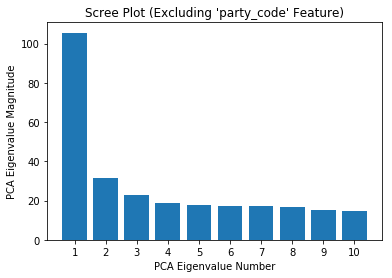

In [17]:
# Now let's evaluate earlier assumption of two component PCA.  Do this by increasing n_components and 
# then visualizing with a scree plot to investigate if two was a good choice. Magnitude of eigenvalue
# indicates relative importance of each principal component

pca_no_party_label_ten = PCA(n_components=10)
principalComponents_no_party_label_ten = pca_no_party_label_ten.fit_transform(df_standardized[columns_to_include])
pca_eigenvalues = pca_no_party_label_ten.singular_values_

print pca_eigenvalues

plt.bar(range(1,len(pca_eigenvalues)+1), pca_eigenvalues, tick_label=range(1,len(pca_eigenvalues)+1))
plt.xlabel('PCA Eigenvalue Number')
plt.ylabel('PCA Eigenvalue Magnitude')
plt.title('Scree Plot (Excluding \'party_code\' Feature)')
plt.show()

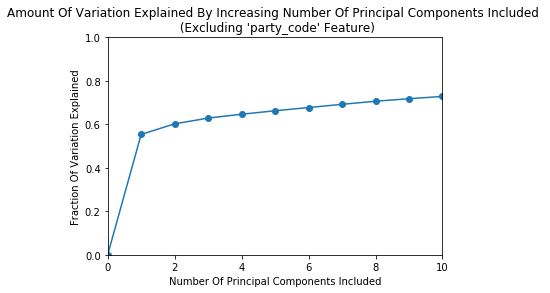

In [18]:
# How much extra variation can be explained by increasing number of principal components?
# pca_no_party_label_ten.explained_variance_ratio_ returns the marginal amount of variation explained by 
# adding an additional dimension. As can be seen, one principal component is essentially enough to predict
# party.  As shown above, this one principal component is highly correlated to party_code

numberEigenvaluesIncluded = [index for index in range(0,len(pca_no_party_label_ten.explained_variance_ratio_) + 1)]
amountVariationExplained = [sum(pca_no_party_label_ten.explained_variance_ratio_[0:m]) for m in range(0,len(numberEigenvaluesIncluded))]

plt.plot(numberEigenvaluesIncluded, amountVariationExplained, '-o')
plt.xlim(0,10)
plt.xlabel('Number Of Principal Components Included')
plt.ylim(0,1)
plt.ylabel('Fraction Of Variation Explained')
plt.title('Amount Of Variation Explained By Increasing Number Of Principal Components Included \n (Excluding \'party_code\' Feature)')
plt.show()

In [19]:
# Which are the most important votes and/or features?  These can be determined from the 
# largest components of the first principal component eigenvector; the indices of the
# largest components reveal the important votes/features while the values of the first
# principal component indicate the relative importance.


# Find indices of largest principal components in absolute value, which correspond to important votes/features
n_most_important_features = 30
ind = np.abs(pca_no_party_label_ten.components_[0]).argsort()[-n_most_important_features:]
ind = list(reversed(ind)) # argsort() yields ind in increasing order; need to reverse to yield in decreasing order

# Visualize important features and their relative importance in table form
from prettytable import PrettyTable

t = PrettyTable(['Feature', 'Relative Importance'])
for index in range(len(df_standardized[columns_to_include].columns[ind])):
    t.add_row([df_standardized[columns_to_include].columns[ind][index], pca_no_party_label_ten.components_[0][ind][index]])
print(t)

+---------+-----------------------+
| Feature |  Relative Importance  |
+---------+-----------------------+
| 205_Yea |  0.04635138196408271  |
| 119_Yea |  0.04635138196408271  |
| 315_Yea |  0.04635138196408271  |
| 104_Yea |  0.04635138196408271  |
| 105_Nay |  0.04635138196408271  |
|  86_Yea |  0.04635138196408271  |
| 101_Yea |  0.04635138196408271  |
| 111_Yea |  0.04635138196408271  |
|  94_Yea |  0.04635138196408271  |
| 117_Yea |  0.04635138196408271  |
|  91_Yea |  0.04635138196408271  |
| 110_Yea |  0.04635138196408271  |
|  7_Yea  |  -0.04635138196408269 |
| 327_Nay |  -0.04635138196408269 |
| 101_Nay |  -0.04635138196408269 |
| 315_Nay |  -0.04635138196408269 |
| 119_Nay |  -0.04635138196408269 |
|  94_Nay |  -0.04635138196408269 |
| 137_Yea |  -0.04635138196408269 |
| 104_Nay |  -0.04635138196408269 |
| 105_Yea |  -0.04635138196408269 |
| 127_Nay |  -0.04635138196408269 |
| 110_Nay |  -0.04635138196408269 |
| 117_Nay |  -0.04635138196408269 |
| 111_Nay |  -0.046351381964

In [20]:
# Which are the five senators from each party that are most extreme along 'Principal Component 1'?

n_senators = 5

# Republicans
print df_final_no_party_label[df_final_no_party_label['party_code'] == 'R'].sort_values(by=['Principal Component 1'])[0:n_senators]

# Democrats
print df_final_no_party_label[df_final_no_party_label['party_code'] == 'D'].sort_values(by=['Principal Component 1'], ascending=False)[0:n_senators]

                      name party_code  Principal Component 1  \
38            RISCH, James          R             -11.844211   
8              COTTON, Tom          R             -11.696016   
92     CRAPO, Michael Dean          R             -11.593595   
66    SASSE, Benjamin Eric          R             -11.476766   
59  INHOFE, James Mountain          R             -11.389412   

    Principal Component 2  
38               2.894118  
8                2.351114  
92               3.286977  
66               4.976586  
59               0.062704  
                   name party_code  Principal Component 1  \
5     WARREN, Elizabeth          D              13.305888   
13  GILLIBRAND, Kirsten          D              13.116639   
57  MARKEY, Edward John          D              13.074026   
35        MERKLEY, Jeff          D              12.952629   
36        HIRONO, Mazie          D              12.930278   

    Principal Component 2  
5                3.088347  
13               1.99008

In [21]:
# What's going on with the senators along the 'Principal Component 2' direction?

# Five senators with largest positive 'Principal Component 2' scores
n_senators = 5
print df_final_no_party_label.sort_values(by=['Principal Component 2'], ascending=False)[0:n_senators]

# Whereas 'Principal Component 1' partitions the senators along party lines, perhaps high 'Principal Component 2' scores 
# correlate with something more like "anti-establishmentarianism" or "populism"?

                         name party_code  Principal Component 1  \
2   CRUZ, Rafael Edward (Ted)          R              -7.806151   
96                  LEE, Mike          R              -8.823191   
29           SANDERS, Bernard          D               9.820418   
78                 PAUL, Rand          R              -8.192021   
75               RUBIO, Marco          R              -8.333257   

    Principal Component 2  
2               12.776811  
96               9.677327  
29               9.176280  
78               8.832846  
75               7.707272  


In [22]:
# Which senators have large, negative 'Principal Component 2' scores?

# Ten senators with largest negative 'Principal Component 2' scores
n_senators = 10
print df_final_no_party_label.sort_values(by=['Principal Component 2'])[0:n_senators]

# Maybe these senators are establishmentarians or the least populist?

                              name party_code  Principal Component 1  \
21         COLLINS, Susan Margaret          R              -2.457515   
25                ALEXANDER, Lamar          R              -7.176065   
89           COCHRAN, William Thad          R              -9.229303   
90                   AYOTTE, Kelly          R              -4.913204   
46               KIRK, Mark Steven          R              -4.110758   
99              HATCH, Orrin Grant          R              -9.211539   
64   ROUNDS, Marion Michael (Mike)          R              -9.818594   
86           CAPITO, Shelley Moore          R              -8.669295   
3   HEITKAMP, Mary Kathryn (Heidi)          D               5.462868   
20                   DONNELLY, Joe          D               5.263826   

    Principal Component 2  
21              -5.063420  
25              -4.701435  
89              -4.615951  
90              -4.569179  
46              -4.006065  
99              -3.969515  
64         